In [14]:
import matplotlib.pyplot as plt 

plt.rcParams['text.usetex'] = True #Let TeX do the typsetting
plt.rcParams['text.latex.preamble'] = [r'\usepackage{sansmath}', r'\sansmath'] #Force sans-serif math mode (for axes labels)
plt.rcParams['font.family'] = 'sans-serif' # ... for regular text
plt.rcParams['font.sans-serif'] = 'Helvetica, Avant Garde, Computer Modern Sans serif' # Choose a nice font here


import seaborn as sns
# import pandas as pd 
import numpy as np

sns.set_style("whitegrid")

# Tableau 20 Colors
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
             
# Tableau Color Blind 10
tableau20blind = [(0, 107, 164), (255, 128, 14), (171, 171, 171), (89, 89, 89),
             (95, 158, 209), (200, 82, 0), (137, 137, 137), (163, 200, 236),
             (255, 188, 121), (207, 207, 207)]
  
# Rescale to values between 0 and 1 
for i in range(len(tableau20)):  
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)
    
for i in range(len(tableau20blind)):  
    r, g, b = tableau20blind[i]  
    tableau20blind[i] = (r / 255., g / 255., b / 255.)

markers = ['+', 'x', '.', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', '|', '_', 'P', 'X', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11 ]

patterns = ('-', '+', 'x', '\\', '*', 'o', 'O', '.', '/')

def get_bar_plot(xx,zz, labels, name, fc = 20,): 
    
    x_pos = np.arange(1)*3
    width = 0.4
    plots_1 = []
    fig,ax = plt.subplots()
#     fig.set_figheight(5)
#     fig.set_figwidth(7)
    for i, x in enumerate(xx):
        plots_1.append(ax.bar(x_pos+ width*(i-len(x)//2), x, width-0.1, edgecolor='black', color= tableau20blind[i], hatch=patterns[i], label=labels[i]))
    
    ax.set_ylabel('Average Error Gap',fontsize=fc+5)
#     ax.set_xlabel('Methods',fontsize=fc)
    ax.set_xticks(x_pos -width*len(x)//2)
    ax.set_xticklabels(" ", fontsize=fc)
#     ax2 = ax.twinx()
#     plots_2 = []
#     for i, x in enumerate(zz):
#         plots_2.append(ax2.plot(yy, x, linestyle='--', color= tableau20blind[i], marker=markers[i]))
    
#     ax2.set_ylabel('Calib Error', fontsize=fc)
    
    ax.legend(fontsize=fc-3)
    ax.tick_params(labelsize=fc+5)
#     ax2.tick_params(labelsize=fc)
#     ax.tick_params(labelsize=fc)
#     plt.ylim(0,10)
    plt.savefig("figures/" + name, transparent=True, bbox_inches='tight')
    plt.show()
    
    


<ipython-input-14-58249d319a9c>:4: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  plt.rcParams['text.latex.preamble'] = [r'\usepackage{sansmath}', r'\sansmath'] #Force sans-serif math mode (for axes labels)


100
(1, 5)


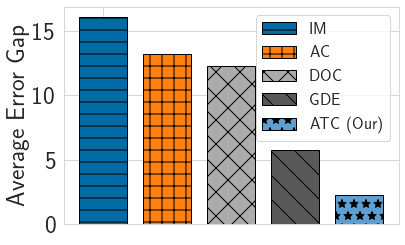

In [16]:
filename = "outputs/ImageNet-200/DenseNet121_0.0001_0.0_0.0_Adam_50_1111/predicted_acc_T_3/45.csv"
# start_epoch = 420
# gap_epoch = 30
# end_epoch = 450
# epochs = [epoch for epoch in range(start_epoch, end_epoch, gap_epoch)]


xx = []
zz = []

# for epoch in epochs:
x = [0.0, 0.0, 0.0, 0.0, 0.0]
y = [0.0, 0.0]
with open(filename , "r") as f: 
    count = 0
    lines = f.readlines()
    for i,line in enumerate(lines):
#         if i > 102 or i <1: continue
#         if i <= 102 and i >=1: continue
        vals = line.rstrip().split(",")
        vals = [float(v) for v in vals]
# 
        x[3] += np.abs(vals[0] - vals[20])
        x[4] += np.abs(vals[0] - vals[12])
#         x[5] += np.abs(vals[1] - vals[12])
        x[0] += np.abs(vals[0] - vals[19])
        x[1] += np.abs(vals[0] - vals[15])
        x[2] += np.abs(vals[0] - vals[17])
        y[0] += np.abs(vals[2])
        y[1] += np.abs(vals[4])
        count +=1 
    x = np.array(x)/count
    y = np.array(y)/count
    print(count)
    xx.append(x)
    zz.append(y)

xx = np.array(xx)
zz = np.array(zz)

print(xx.shape)
get_bar_plot(xx.T, zz.T, labels=["IM", "AC", "DOC", "GDE", "ATC (Our)"], name="intro_1b.pdf")

In [4]:
filename = "outputs/entity30/DenseNet121_0.1_0.0001_0.9_SGD_300_1111/predicted_acc_T_fit/270.csv"
# start_epoch = 420
# gap_epoch = 30
# end_epoch = 450
# epochs = [epoch for epoch in range(start_epoch, end_epoch, gap_epoch)]


xx = []
zz = []

# for epoch in epochs:
#     x = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
#     y = [0.0, 0.0]
with open(filename , "r") as f: 
    count = 0
    lines = f.readlines()
    for i,line in enumerate(lines):
        if i > 102 or i <1: continue
#         if i <= 102 and i >=1: continue
        vals = line.rstrip().split(",")
        vals = [float(v) for v in vals]
# 
#         x[3] += np.abs(vals[1] - vals[20])
        x[4] += np.abs(vals[1] - vals[10])
        x[5] += np.abs(vals[1] - vals[12])
        x[0] += np.abs(vals[1] - vals[19])
        x[1] += np.abs(vals[1] - vals[15])
        x[2] += np.abs(vals[1] - vals[17])
        y[0] += np.abs(vals[2])
        y[1] += np.abs(vals[4])
        count +=1 
    x = np.array(x)/count
    y = np.array(y)/count
    print(count)
    xx.append(x)
    zz.append(y)

xx = np.array(xx)
zz = np.array(zz)

print(xx.shape)
get_bar_plot(xx.T, zz.T, epochs, labels=["IM", "AC", "DOC", "GDE", "ATC (Max Conf)", "ATC (Entropy)"], name="ImageNet200_DenseNet121_bar.pdf")

IndexError: index 5 is out of bounds for axis 0 with size 5